In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'/Users/mac/Downloads/drug_effectiveness_study.xlsx')

In [3]:
df.head()

,Patient_ID,Age,Sex,Weight_kg,Drug_Brand,Pre_BP,Heart_Rate,Side_Effects_Score,Treatment_Duration_weeks,Adherence_Score,Smoker,Region,Post_BP
0,P0001,68.0,M,77.8,B,148,79.0,2.0,12,0.89,Yes,South America,125.0
1,P0002,58.0,M,73.2,A,175,NaN,1.0,11,0.56,Yes,North America,159.0
2,P0003,44.0,M,65.3,B,158,70.0,0.0,9,0.68,Yes,South America,139.0
3,P0004,72.0,F,85.3,A,140,72.0,2.0,12,0.98,No,North America,126.0
4,P0005,37.0,M,82.8,A,149,62.0,2.0,10,0.96,Yes,Europe,136.0


In [4]:
df.isnull().sum()

Patient_ID                   0
Age                         51
Sex                          0
Weight_kg                   51
Drug_Brand                   0
Pre_BP                       0
Heart_Rate                  51
Side_Effects_Score          51
Treatment_Duration_weeks     0
Adherence_Score              0
Smoker                       0
Region                       0
Post_BP                     51
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                1010 non-null   object 
 1   Age                       959 non-null    float64
 2   Sex                       1010 non-null   object 
 3   Weight_kg                 959 non-null    float64
 4   Drug_Brand                1010 non-null   object 
 5   Pre_BP                    1010 non-null   int64  
 6   Heart_Rate                959 non-null    float64
 7   Side_Effects_Score        959 non-null    float64
 8   Treatment_Duration_weeks  1010 non-null   int64  
 9   Adherence_Score           1010 non-null   float64
 10  Smoker                    1010 non-null   object 
 11  Region                    1010 non-null   object 
 12  Post_BP                   959 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 102.7+ KB


In [6]:
df = df.dropna()

In [7]:
df.duplicated().sum()

5

In [8]:
df = df.drop_duplicates()

In [9]:
df.select_dtypes('object').nunique()

Patient_ID    780
Sex             3
Drug_Brand      4
Smoker          3
Region         10
dtype: int64

In [10]:
df['Sex'].unique()

array(['M', 'F', 'Unknown'], dtype=object)

In [11]:
df['Sex'].value_counts()

Sex
M          394
F          368
Unknown     19
Name: count, dtype: int64

In [12]:
df = df.query("Sex != 'Unknown'")

In [13]:
df['Sex'].value_counts()

Sex
M    394
F    368
Name: count, dtype: int64

In [14]:
df['Drug_Brand'].value_counts()

Drug_Brand
A    271
C    254
B    229
D      8
Name: count, dtype: int64

In [15]:
df = df.query("Drug_Brand != 'D'")

In [16]:
df['Smoker'].value_counts()

Smoker
No           532
Yes          207
Sometimes     15
Name: count, dtype: int64

In [17]:
df['Region'].value_counts().index

Index(['South America', 'Africa', 'Europe', 'North America', 'Asia', 'Europe ',
       'Asia ', 'North America ', 'Africa ', 'South America '],
      dtype='object', name='Region')

In [18]:
df['Region'].value_counts().index = ['South America', 'Africa', 'Europe', 'North America', 'Asia', 'Europe',
       'Asia', 'North America', 'Africa', 'South America']

In [19]:
df['Region'].value_counts()

Region
South America     154
Africa            139
Europe            136
North America     128
Asia              128
Europe             22
Asia               15
North America      13
Africa             12
South America       7
Name: count, dtype: int64

In [20]:
df['Region'] = df['Region'].str.strip()

In [21]:
df['Region'].value_counts()

Region
South America    161
Europe           158
Africa           151
Asia             143
North America    141
Name: count, dtype: int64

In [22]:
#Exploratory Data Analysis



In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,754.0,54.905836,14.456066,30.0,43.00,55.000,67.00,79.0
Weight_kg,754.0,75.648939,11.728055,43.9,67.90,75.800,83.70,112.3
Pre_BP,754.0,160.007958,11.563552,140.0,150.00,160.000,170.00,179.0
Heart_Rate,754.0,79.632626,11.258831,60.0,70.00,79.500,89.00,99.0
Side_Effects_Score,754.0,2.003979,1.452656,0.0,1.00,2.000,3.00,7.0
Treatment_Duration_weeks,754.0,10.055703,1.402739,8.0,9.00,10.000,11.00,12.0
Adherence_Score,754.0,0.749297,0.141524,0.5,0.63,0.755,0.87,1.0
Post_BP,754.0,142.425729,12.899671,107.0,133.00,142.000,153.00,173.0


In [24]:
import dtale

In [25]:
dtale.show(df)

In [26]:
df['BP_reduction'] = df['Pre_BP'] - df['Post_BP']

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,754.0,54.905836,14.456066,30.0,43.00,55.000,67.00,79.0
Weight_kg,754.0,75.648939,11.728055,43.9,67.90,75.800,83.70,112.3
Pre_BP,754.0,160.007958,11.563552,140.0,150.00,160.000,170.00,179.0
Heart_Rate,754.0,79.632626,11.258831,60.0,70.00,79.500,89.00,99.0
Side_Effects_Score,754.0,2.003979,1.452656,0.0,1.00,2.000,3.00,7.0
Treatment_Duration_weeks,754.0,10.055703,1.402739,8.0,9.00,10.000,11.00,12.0
Adherence_Score,754.0,0.749297,0.141524,0.5,0.63,0.755,0.87,1.0
Post_BP,754.0,142.425729,12.899671,107.0,133.00,142.000,153.00,173.0
BP_reduction,754.0,17.582228,5.089557,1.0,14.00,18.000,21.00,40.0


In [28]:
# Ho: The average BP_Reduction = 15
# H1: The average of BP_reduction ≠ 15

In [29]:
# 1. One-sample t-test: BP Reduction ≠ 15
alpha = 0.05
def one_sample_ttest(df, col, test_value):
    test = stats.ttest_1samp(df[col], popmean=test_value)
    p_value = round(test[1], 3)

    if p_value < alpha:
        print(f'Ho is rejected, Hence, the mean {col} is different from {test_value}')
    else:
         print(f'Ho cannot be rejected, Hence, the mean {col} is equal to {test_value}')

In [30]:
one_sample_ttest(df, 'BP_reduction', 15)

Ho is rejected, Hence, the mean BP_reduction is different from 15


In [31]:
# Ho: The Adherence_score = 0.5
# H1: The average of Adherence_score ≠ 0.5
one_sample_ttest(df, 'Adherence_Score', 0.5)

Ho is rejected, Hence, the mean Adherence_Score is different from 0.5


In [ ]:
df['Sex'].unique()[0]

In [35]:
# 1. Independent Sample t-test
alpha = 0.05
def independent_sample_ttest(df, col1, col2):
    test = stats.ttest_ind(
        df[df[col1] == df[col1].unique()[0]][col2],
        df[df[col1] == df[col1].unique()[1]][col2]
    )
    p_value = round(test[1], 3)
    print(f'p-value: {p_value}')
    if p_value < alpha:
        print(f'Ho is rejected, Hence, the mean {col2} is different across {col1} categories')
    else:
         print(f'Ho cannot be rejected, Hence, the mean {col2} is not different across {col1} categories')

In [37]:
# Ho: The mean BP_reduction for male and female is equal
# H1: The mean BP_reduction for male and female is not equal
independent_sample_ttest(df, 'Sex', 'BP_reduction')

p-value: 0.084
Ho cannot be rejected, Hence, the mean BP_reduction is not different across Sex categories


In [39]:
# Ho: The mean weight for male and female is equal
# H1: The mean weight for male and female is not equal
independent_sample_ttest(df, 'Sex', 'Weight_kg')

p-value: 0.817
Ho cannot be rejected, Hence, the mean Weight_kg is not different across Sex categories


In [43]:
alpha = 0.05
def paired_t_test(df, col1, col2):
    test = stats.ttest_rel(df[col1], df[col2])
    p_value = round(test[1], 3)

    print(p_value)
    if p_value < alpha:
        print(f'Ho is rejected, Hence, the mean {col1} and the mean {col2} is different, the drug is effective')
    else:
         print(f'Ho cannot be rejected, Hence, the mean {col1} and the mean {col2} is not different, the drug is not effective')

In [45]:
# Ho: The mean BP of patients before and after taking drugs is equal
# H1: The mean BP of patients before and after taking drugs is not equal
paired_t_test(df, 'Pre_BP', 'Post_BP')

0.0
Ho is rejected, Hence, the mean Pre_BP and the mean Post_BP is different, the drug is effective


In [93]:
df['Region'].unique()

array(['South America', 'North America', 'Europe', 'Africa', 'Asia'],
      dtype=object)

In [97]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [103]:
# 7. ANOVA: BP Reduction by Drug
anova1 = ols('BP_reduction ~ (Drug_Brand)', data=df).fit()
sm.stats.anova_lm(anova1, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
Drug_Brand,2.0,2948.210408,1474.105204,66.862367,1.889422e-27
Residual,751.0,16557.191449,22.046859,NaN,NaN


In [105]:
# Ho: The mean bp_reduction across the three drugs are equal
# h1: The mean bp_reduction across the three drugs are different

In [107]:
df['Drug_Brand'].unique()

array(['B', 'A', 'C'], dtype=object)

In [109]:
#Tuckey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df['BP_reduction'],  # dependent variable, numeric   
                          groups=df['Drug_Brand'],   # independent variable, categorical   
                          alpha=0.05)

In [111]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     A      B   3.0717    0.0 2.0819 4.0614   True
     A      C    4.655    0.0 3.6921  5.618   True
     B      C   1.5834 0.0007 0.5786 2.5882   True
--------------------------------------------------


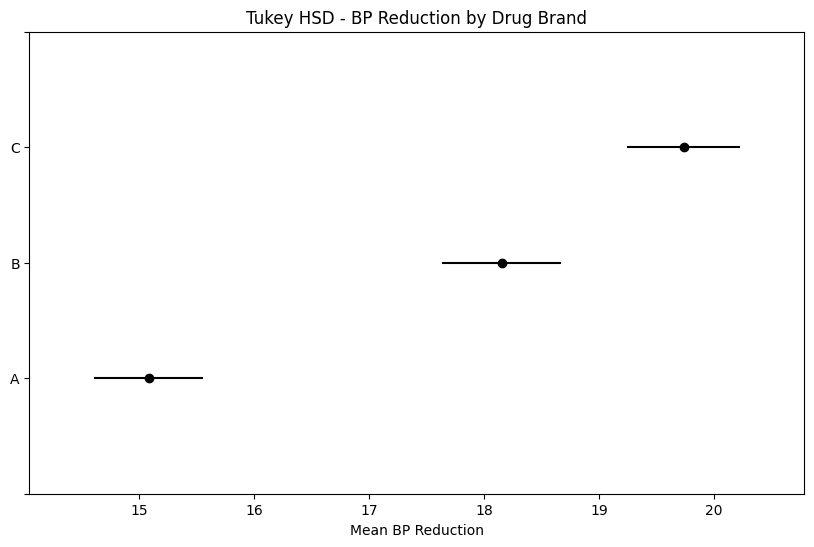

In [113]:
#Tukey plot
tukey.plot_simultaneous()
plt.title('Tukey HSD - BP Reduction by Drug Brand')
plt.xlabel('Mean BP Reduction')
plt.show()

In [221]:
# 7. ANOVA: BP Reduction by Region
anova1 = ols('Heart_Rate ~ (Sex)', data=df).fit()
anova_table = sm.stats.anova_lm(anova1, typ=1)

In [223]:
tukey = pairwise_tukeyhsd(endog=df['Heart_Rate'],  # dependent variable, numeric   
                          groups=df['Sex'],   # independent variable, categorical   
                          alpha=0.05)

In [225]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Sex,1.0,61.963920,61.963920,0.488492,0.484817
Residual,752.0,95389.273481,126.847438,NaN,NaN


In [227]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     F      M  -0.5738 0.4848 -2.1855 1.0379  False
---------------------------------------------------


In [229]:
# def anova(df, col1, col2):
#     anova1 = ols('col1 ~ (col2)', data=df).fit()
#     anova_table = sm.stats.anova_lm(anova1, typ=1)

#     # anova1 = ols('BP_reduction ~ (Region)', data=df).fit()

#     p_value = round(anova_table['PR(>F)'][0], 3)

#     return anova_table
#     print(f"The p-value os {p_value}")
#     if p_value < 0.05:
#         print(f'The mean {col1} across the groups of {col2} differs significantly')

#         tukey = pairwise_tukeyhsd(endog=df[col1],  # dependent variable, numeric   
#                           groups=df[col2],   # independent variable, categorical   
#                           alpha=0.05)
        
#             #Tukey plot
#         tukey.plot_simultaneous()
#         plt.title(f'Tukey HSD - {col1} by {col2}')
#         plt.xlabel(f'Mean {col1}')
#         plt.show()
#     else:
#         print(f'The mean {col1} across the groups of {col2} is equal')

In [193]:
df['Drug_Brand']

0       B
2       B
3       A
4       A
5       B
       ..
996     A
997     A
998     A
999     C
1001    C
Name: Drug_Brand, Length: 754, dtype: object

In [155]:
round(anova_table['PR(>F)'][0], 3)

/var/folders/l6/fw3m61xn11gc1cfcswqttvxr0000gn/T/ipykernel_40407/572601143.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.782

In [247]:
# 13. Correlation: Age vs BP Reduction
stats.pearsonr(df['Pre_BP'], df['Post_BP'])

PearsonRResult(statistic=-0.04719019058920295, pvalue=0.19553778285907117)

<Axes: >

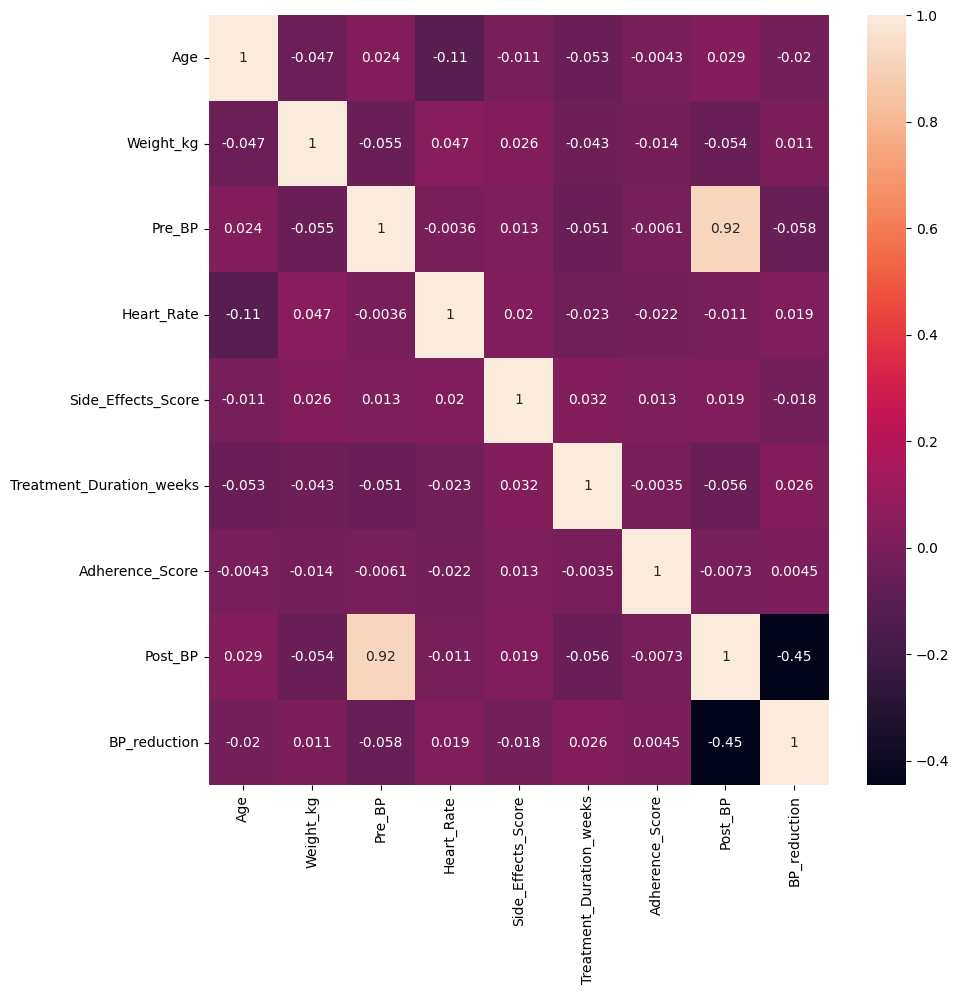

In [235]:
corr = df.select_dtypes('number').corr()
plt.figure(figsize  = (10,10))
sns.heatmap(corr, annot = True)